In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Advertising.csv')
df.shape
df = df.rename(columns={"Unnamed: 0": "S.no"})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S.no       200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.head()

,S.no,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,S.no,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.sample(5)

,S.no,TV,Radio,Newspaper,Sales
56,57,7.3,28.1,41.4,5.5
0,1,230.1,37.8,69.2,22.1
166,167,17.9,37.6,21.6,8.0
83,84,68.4,44.5,35.6,13.6
192,193,17.2,4.1,31.6,5.9


In [7]:
#finding the missing value
df.isna()

,S.no,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


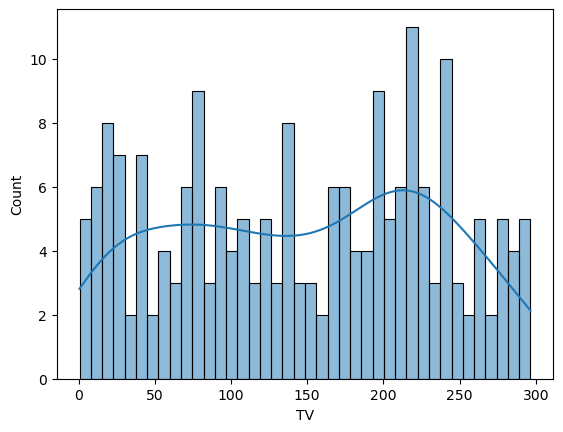

In [8]:
#Distribution of histogram sns.histplot(x=df[tv])
sns.histplot(x=df["TV"], kde=True, bins=40)
plt.show()

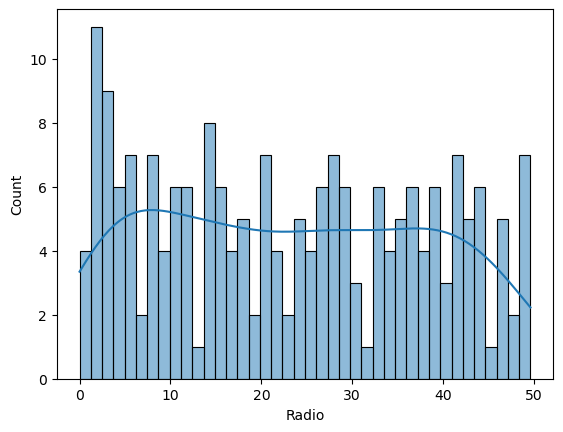

In [9]:
sns.histplot(x=df["Radio"], kde=True, bins=40)
plt.show()

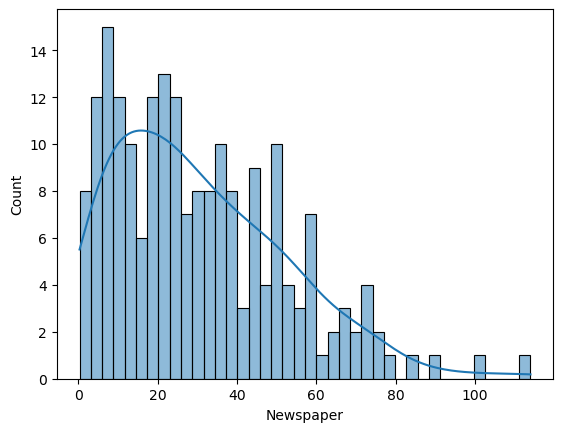

In [10]:
sns.histplot(x=df["Newspaper"], kde=True, bins=40)
plt.show()

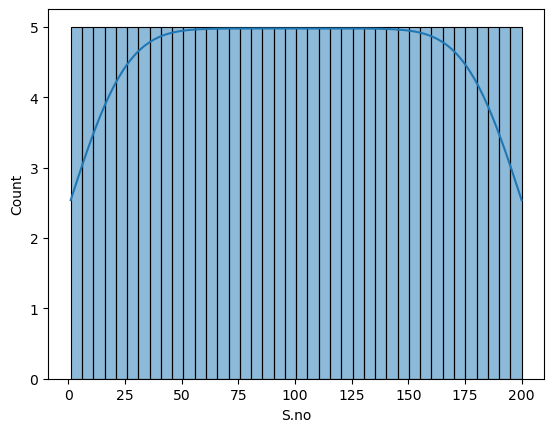

In [11]:
sns.histplot(x=df["S.no"], kde=True, bins=40)
plt.show()

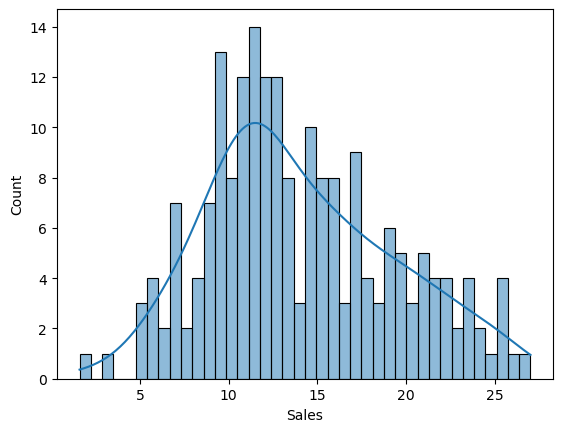

In [12]:
sns.histplot(x=df["Sales"], kde=True, bins=40)
plt.show()

In [13]:
df['TV'].skew()#left skew and negative skew

np.float64(-0.06985336213274573)

In [14]:
df['S.no'].skew()# It is a normal distrubution

np.float64(0.0)

In [15]:
df['Sales'].skew()#normal distribition because we are considering -0.5 to 0.5 

np.float64(0.4075714250767127)

In [16]:
df['Newspaper'].skew()#Postive skew or right skew

np.float64(0.8947204074986175)

In [17]:
df['Radio'].skew()#Postive skew or right skew

np.float64(0.09417463149664404)

## Relationship with target variable output

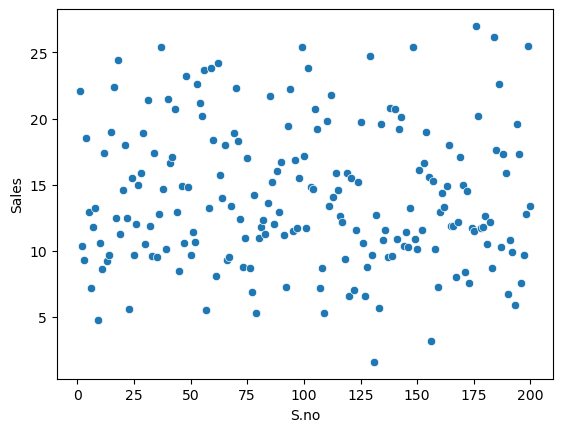

In [18]:
sns.scatterplot(x=df['S.no'],y=df['Sales'])
plt.show()

TV is mild left skew

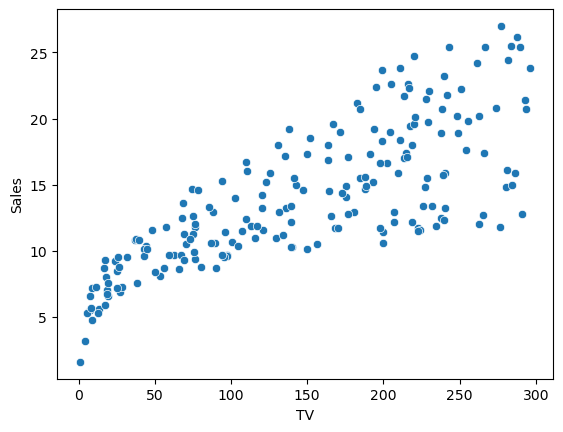

In [19]:
sns.scatterplot(x=df['TV'],y=df['Sales'])
plt.show()

Newspaper is strong postive skew

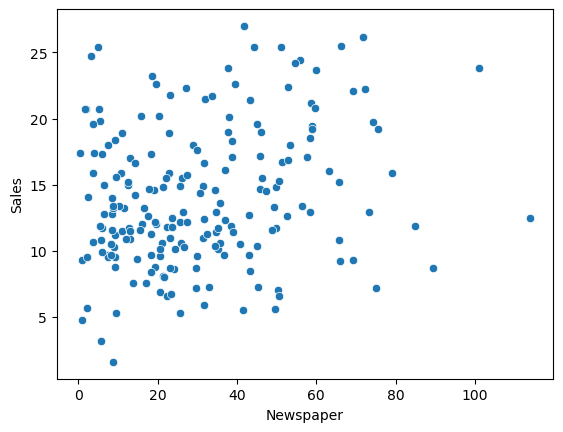

In [20]:
sns.scatterplot(x=df['Newspaper'],y=df['Sales'])
plt.show()

Radio is mild positive Skrew

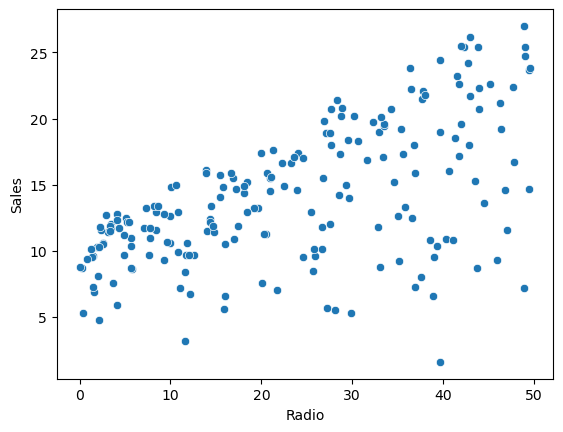

In [21]:
sns.scatterplot(x=df['Radio'],y=df['Sales'])
plt.show()

In [22]:
df.corr()

,S.no,TV,Radio,Newspaper,Sales
S.no,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

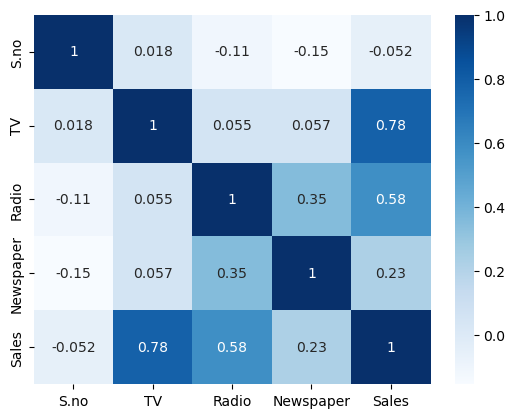

In [23]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [24]:
df.drop('S.no',axis=1,inplace=True)

## Simple linear regression

In [25]:
#Step-1 Independent and dependent variable creation 
x=df[['TV']]#x variable contains one feature

In [26]:
y=df.Sales## y is target

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=4)

In [28]:
print(len(x_test))
print(len(y_train))

40
160


In [29]:
#step-3 Creating model
from sklearn.linear_model import LinearRegression
LR= LinearRegression() # Object creation
LR.fit(x_train,y_train) # training of linear regression
y_predict=LR.predict(x_test)

In [30]:
from sklearn.metrics import (r2_score , mean_squared_error , mean_absolute_error, root_mean_squared_error)
r2=r2_score(y_test,y_predict)
r2*100

46.13874633681752

In [31]:
print("MSE :", mean_squared_error(y_test,y_predict))
print("MAE :", mean_absolute_error(y_test,y_predict))
print("RMSE :",root_mean_squared_error(y_test,y_predict))

MSE : 13.06226628830567
MAE : 2.990565035759226
RMSE : 3.6141757412037494


## Simple linear regression where x= Radio

In [32]:
#Step-1 Independent and dependent variable creation 
x=df[['Radio']]#x variable contains one feature
y=df.Sales## y is target

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=4)

In [34]:
print(len(x_test))
print(len(y_train))

40
160


In [35]:
#step-3 Creating model
from sklearn.linear_model import LinearRegression
LR= LinearRegression() # Object creation
LR.fit(x_train,y_train) # training of linear regression
y_predict=LR.predict(x_test)

In [36]:
from sklearn.metrics import (r2_score , mean_squared_error , mean_absolute_error, root_mean_squared_error)
r2=r2_score(y_test,y_predict)
r2*100

37.86450118378573

In [37]:
print("MSE :", mean_squared_error(y_test,y_predict))
print("MAE :", mean_absolute_error(y_test,y_predict))
print("RMSE :",root_mean_squared_error(y_test,y_predict))

MSE : 15.068910882943161
MAE : 3.268917036469783
RMSE : 3.881869508747449


## simple linear regreesion all inputs


In [42]:
#Step-1 Independent and dependent variable creation 
x=df[['TV', 'Radio','Newspaper',]]#x variable contains one feature
y=df.Sales## y is target
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=4)

In [44]:
print(len(x_test))
print(len(y_train))

40
160


In [45]:
#step-3 Creating model
from sklearn.linear_model import LinearRegression
LR= LinearRegression() # Object creation
LR.fit(x_train,y_train) # training of linear regression
y_predict=LR.predict(x_test)

In [46]:
from sklearn.metrics import (r2_score , mean_squared_error , mean_absolute_error, root_mean_squared_error)
r2=r2_score(y_test,y_predict)
r2*100

90.85774752313168

In [47]:
print("MSE :", mean_squared_error(y_test,y_predict))
print("MAE :", mean_absolute_error(y_test,y_predict))
print("RMSE :",root_mean_squared_error(y_test,y_predict))

MSE : 2.217151072541896
MAE : 1.2114892606469103
RMSE : 1.4890100982001082
